In [1]:
# Benchmark: measuring runtime versus # iterations

In [2]:
#imports
import os, time, datetime, json, yaml
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline
%load_ext autoreload
%autoreload 2
np.warnings.filterwarnings('ignore')

#excursion package imports
import excursion.test_suite.test_functions.fast_1D as testcase_1D

In [3]:
file = open('../excursion/test_suite/algorithm_options/algorithm_specs_test.yaml', "r")
algorithm_opts = yaml.safe_load(file)
print('algorithm_opts =')
print(json.dumps(algorithm_opts, indent=4))

from excursion.learner import Learner
from excursion.excursion import ExcursionProblem

thresholds = [0.7]
bounding_box = [[0, 1]]
ndim = 1
grid_step_size = [100]
acq_grid_step_size = grid_step_size
problem_one_details = ExcursionProblem(thresholds=thresholds, bounding_box=bounding_box, ndim=ndim, grid_step_size=grid_step_size,
                                       functions=testcase_1D.true_functions)

learner_one = Learner(problem_one_details, algorithm_opts)

updates = range(10, 40, 1)


algorithm_opts =
{
    "example": "Simple Learner Usage",
    "ninit": 3,
    "init_type": "random",
    "jump_start": false,
    "device": "cuda",
    "likelihood": {
        "likelihood_type": "GaussianLikelihood",
        "epsilon": 0.0
    },
    "model": {
        "type": "ExactGP",
        "fit_optimizer": "Adam"
    },
    "acq": {
        "acq_type": "mes"
    }
}


In [4]:
means = []
stdev = []
for n in updates:
    runs = []
    for run in range(10):
        learner_one = Learner(testcase_1D, algorithm_opts)


        start_time = time.process_time()

        n_updates = n
        #save results in folder
        # timestampStr = datetime.datetime.now().strftime('%d-%b-%Y_%H_%M_%S') + '\\'
        # outputfolder = r'C:\Users\excursion\Documents\excursion_project\excursion\examples\results'
        # outputfolder = os.path.join(outputfolder, timestampStr)
        # os.makedirs(outputfolder)

        for iteration in range(n_updates):
            x_one = learner_one.suggest()
            result_one = learner_one.evaluate_and_tell(x_one)

        #save results
        end_time = time.process_time() - start_time

        # estimator.print_results(outputfolder, testcase_details, algorithm_opts)


        runs.append(end_time)

    runs = pd.Series(runs)
    stdev.append(runs.std(ddof=0))
    means.append(runs.mean())

KeyboardInterrupt: 

In [3]:
output = pd.DataFrame(data = {'mean': means, 'stdev': stdev}, dtype=float)

timestampStr = datetime.datetime.now().strftime('%d-%b-%Y_%H_%M_%S') + '\\'
outputfolder = r'C:\Users\excursion\Documents\excursion_project\excursion\examples\results'
outputfolder = os.path.join(outputfolder, timestampStr)
os.makedirs(outputfolder)

with open(outputfolder + "rf_gpu_mes.json", "w") as f:
    output.to_json(path_or_buf=f, indent=4)

NameError: name 'means' is not defined

In [3]:
with open(r'C:\Users\excursion\Documents\excursion_project\no_git\jason_refactor\examples\results\06-Jul-2021_07_24_33\jrf.json', "r") as f:
    jrf = pd.io.json.read_json(path_or_buf=f, typ='frame', dtype=float)

with open(r'C:\Users\excursion\Documents\excursion_project\no_git\irina_developer\examples\results\06-Jul-2021_08_12_28\jrf.json', "r") as f:
    idev = pd.io.json.read_json(path_or_buf=f, typ='frame', dtype=float)

with open(r'C:\Users\excursion\Documents\excursion_project\no_git\lukas_master\examples\results\06-Jul-2021_09_35_17\lm.json', "r") as f:
    lm = pd.io.json.read_json(path_or_buf=f, typ='frame', dtype=float)

with open(r'C:\Users\excursion\Documents\excursion_project\no_git\diana_hep\examples\results\06-Jul-2021_13_52_40\lm.json', "r") as f:
    diana = pd.io.json.read_json(path_or_buf=f, typ='frame', dtype=float)

with open(r'C:\Users\excursion\Documents\excursion_project\excursion\examples\results\09-Jul-2021_22_06_15\jrf.json', "r") as f:
    jrfgpu = pd.io.json.read_json(path_or_buf=f, typ='frame', dtype=float)

with open(r'C:\Users\excursion\Documents\excursion_project\excursion\examples\results\10-Jul-2021_03_03_57\rf_gpu_pes.json', "r") as f:
    jrfgpupes = pd.io.json.read_json(path_or_buf=f, typ='frame', dtype=float)

with open(r'C:\Users\excursion\Documents\excursion_project\excursion\examples\results\04-Aug-2021_12_03_53\rf_gpu_mes.json', "r") as f:
    jrfgpumes = pd.io.json.read_json(path_or_buf=f, typ='frame', dtype=float)

with open(r'C:\Users\excursion\Documents\excursion_project\excursion\examples\results\07-Aug-2021_21_52_42\rf_2d_cpu_pes.json', "r") as f:
    rf_2d_cpu_pes = pd.io.json.read_json(path_or_buf=f, typ='frame', dtype=float)

with open(r'C:\Users\excursion\Documents\excursion_project\no_git\irina_developer\examples\results\08-Aug-2021_13_47_06\idev_2d_pes_gpu.json', "r") as f:
    idev_2d_pes_gpu = pd.io.json.read_json(path_or_buf=f, typ='frame', dtype=float)

with open(r'C:\Users\excursion\Documents\excursion_project\excursion\examples\results\08-Aug-2021_18_15_36\rf_2d_gpu_mes.json', "r") as f:
    rf_2d_gpu_mes = pd.io.json.read_json(path_or_buf=f, typ='frame', dtype=float)



No handles with labels found to put in legend.


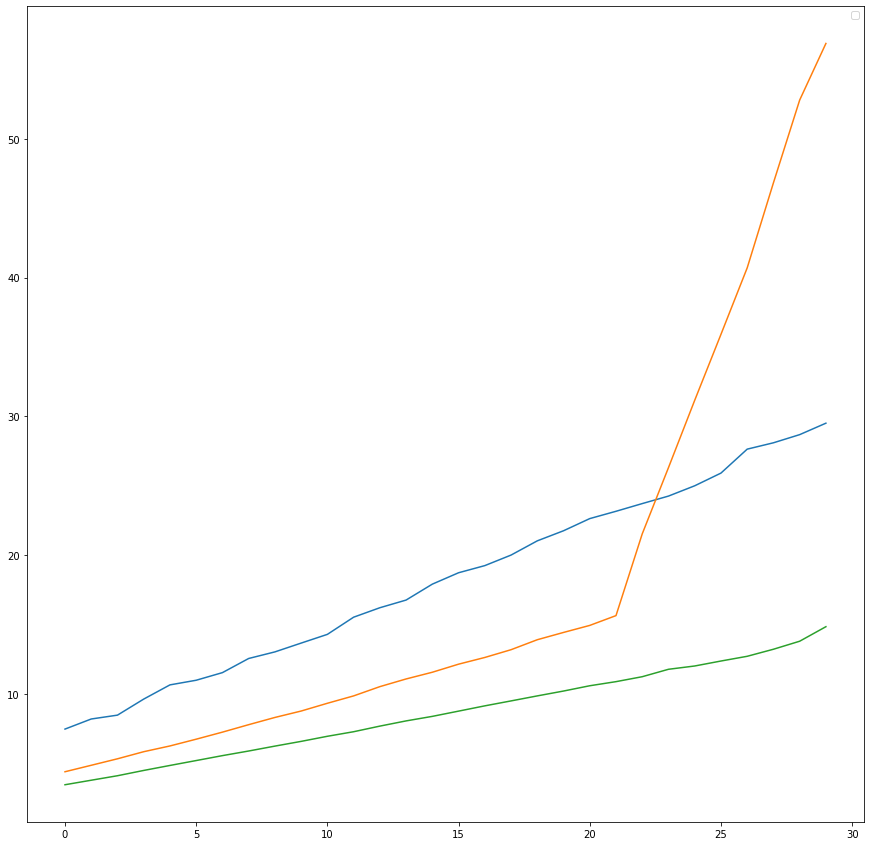

In [7]:
fig = plt.figure(figsize=(15,15))
# using MES
plt.plot(jrf.index.to_list(), jrf['mean_jrf'], )
# plt.plot(idev.index.to_list(), idev['mean_jrf'])

# Using PES lukas og code
plt.plot(lm.index.to_list(), lm['mean_lm'])
# plt.plot(diana.index.to_list(), diana['mean_lm'])

# using MES
# plt.plot(jrfgpu.index.to_list(), jrfgpu['mean'])
# plt.plot(jrfgpupes.index.to_list(), jrfgpupes['mean'])

# plt.plot(jrfgpumes.index.to_list(), jrfgpumes['mean'])
# plt.plot(idev_2d_pes_gpu.index.to_list(), idev_2d_pes_gpu['mean_idev'])
# plt.plot(rf_2d_cpu_pes.index.to_list(), rf_2d_cpu_pes['mean'])

plt.plot(rf_2d_gpu_mes.index.to_list(), rf_2d_gpu_mes['mean'])


plt.legend()
